In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:/USERS/YASHN/flight_price_prediction_dataset.csv')
df

,Unnamed: 0,airline_name,date_of_journey,Source,Destination,departure_time,arrival_time,duration,total_stops,Price
0,0,Indigo,05-05-2022,Bangalore,Mumbai,06:00,07:35,01h 35m,non-stop,"6,529"
1,1,GO FIRST,05-05-2022,Bangalore,Mumbai,05:45,07:25,01h 40m,non-stop,"6,529"
2,2,AirAsia,05-05-2022,Bangalore,Mumbai,22:40,00:20,01h 40m,non-stop,"6,529"
3,3,Indigo,05-05-2022,Bangalore,Mumbai,07:00,08:50,01h 50m,non-stop,"6,529"
4,4,AirAsia,05-05-2022,Bangalore,Mumbai,19:30,21:20,01h 50m,non-stop,"6,529"
...,...,...,...,...,...,...,...,...,...,...
1789,1789,SpiceJet,08-05-2022,Delhi,Kolkata,13:05,18:30,05h 25m,1-stop,"21,599"
1790,1790,Air India,08-05-2022,Delhi,Kolkata,21:15,23:50,26h 35m,1-stop,NaN
1791,1791,Air India,08-05-2022,Delhi,Kolkata,20:00,23:50,27h 50m,1-stop,NaN
1792,1792,Air India,08-05-2022,Delhi,Kolkata,19:00,23:50,28h 50m,1-stop,NaN


In [3]:
#checking for the shape of the dataset
df.shape

(1794, 10)

In [4]:
#checking for the null values
df.isnull().sum()

Unnamed: 0           0
airline_name         0
date_of_journey      0
Source               0
Destination          0
departure_time       0
arrival_time         0
duration             0
total_stops          0
Price              363
dtype: int64

There are null values in our dataset, which we need to fill before proceeding further.

In [5]:
#checking for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1794 non-null   int64 
 1   airline_name     1794 non-null   object
 2   date_of_journey  1794 non-null   object
 3   Source           1794 non-null   object
 4   Destination      1794 non-null   object
 5   departure_time   1794 non-null   object
 6   arrival_time     1794 non-null   object
 7   duration         1794 non-null   object
 8   total_stops      1794 non-null   object
 9   Price            1431 non-null   object
dtypes: int64(1), object(9)
memory usage: 140.3+ KB


In [6]:
#Dropping the unwanted column
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df

,airline_name,date_of_journey,Source,Destination,departure_time,arrival_time,duration,total_stops,Price
0,Indigo,05-05-2022,Bangalore,Mumbai,06:00,07:35,01h 35m,non-stop,"6,529"
1,GO FIRST,05-05-2022,Bangalore,Mumbai,05:45,07:25,01h 40m,non-stop,"6,529"
2,AirAsia,05-05-2022,Bangalore,Mumbai,22:40,00:20,01h 40m,non-stop,"6,529"
3,Indigo,05-05-2022,Bangalore,Mumbai,07:00,08:50,01h 50m,non-stop,"6,529"
4,AirAsia,05-05-2022,Bangalore,Mumbai,19:30,21:20,01h 50m,non-stop,"6,529"
...,...,...,...,...,...,...,...,...,...
1789,SpiceJet,08-05-2022,Delhi,Kolkata,13:05,18:30,05h 25m,1-stop,"21,599"
1790,Air India,08-05-2022,Delhi,Kolkata,21:15,23:50,26h 35m,1-stop,NaN
1791,Air India,08-05-2022,Delhi,Kolkata,20:00,23:50,27h 50m,1-stop,NaN
1792,Air India,08-05-2022,Delhi,Kolkata,19:00,23:50,28h 50m,1-stop,NaN


In [7]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')
df.head()

,airline_name,date_of_journey,Source,Destination,departure_time,arrival_time,duration,total_stops,Price
0,Indigo,05-05-2022,Bangalore,Mumbai,06:00,07:35,01h 35m,non-stop,6529.0
1,GO FIRST,05-05-2022,Bangalore,Mumbai,05:45,07:25,01h 40m,non-stop,6529.0
2,AirAsia,05-05-2022,Bangalore,Mumbai,22:40,00:20,01h 40m,non-stop,6529.0
3,Indigo,05-05-2022,Bangalore,Mumbai,07:00,08:50,01h 50m,non-stop,6529.0
4,AirAsia,05-05-2022,Bangalore,Mumbai,19:30,21:20,01h 50m,non-stop,6529.0


In [8]:
#Checking all column names
df.columns

Index(['airline_name', 'date_of_journey', 'Source', 'Destination',
       'departure_time', 'arrival_time', 'duration', 'total_stops', 'Price'],
      dtype='object')

In [9]:
#ReChecking the data types of all columns
df.dtypes

airline_name        object
date_of_journey     object
Source              object
Destination         object
departure_time      object
arrival_time        object
duration            object
total_stops         object
Price              float64
dtype: object

In [10]:
df['Price']=df['Price'].fillna(df['Price'].mode()[0])
df

,airline_name,date_of_journey,Source,Destination,departure_time,arrival_time,duration,total_stops,Price
0,Indigo,05-05-2022,Bangalore,Mumbai,06:00,07:35,01h 35m,non-stop,6529.0
1,GO FIRST,05-05-2022,Bangalore,Mumbai,05:45,07:25,01h 40m,non-stop,6529.0
2,AirAsia,05-05-2022,Bangalore,Mumbai,22:40,00:20,01h 40m,non-stop,6529.0
3,Indigo,05-05-2022,Bangalore,Mumbai,07:00,08:50,01h 50m,non-stop,6529.0
4,AirAsia,05-05-2022,Bangalore,Mumbai,19:30,21:20,01h 50m,non-stop,6529.0
...,...,...,...,...,...,...,...,...,...
1789,SpiceJet,08-05-2022,Delhi,Kolkata,13:05,18:30,05h 25m,1-stop,21599.0
1790,Air India,08-05-2022,Delhi,Kolkata,21:15,23:50,26h 35m,1-stop,6529.0
1791,Air India,08-05-2022,Delhi,Kolkata,20:00,23:50,27h 50m,1-stop,6529.0
1792,Air India,08-05-2022,Delhi,Kolkata,19:00,23:50,28h 50m,1-stop,6529.0


In [11]:
# Rechecking Null Values
df.isnull().sum()

airline_name       0
date_of_journey    0
Source             0
Destination        0
departure_time     0
arrival_time       0
duration           0
total_stops        0
Price              0
dtype: int64

<AxesSubplot:>

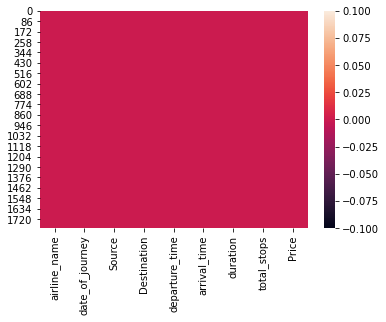

In [12]:
# plotting heatmap
sns.heatmap(df.isnull())

In [13]:
# Checking for value counts of all the features and target variable

Vistara      490
Air India    363
Indigo       361
GO FIRST     229
SpiceJet     183
AirAsia      168
Name: airline_name, dtype: int64

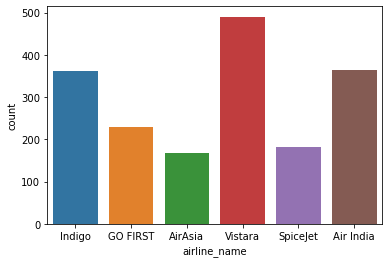

In [14]:
sns.countplot(df['airline_name'])
df['airline_name'].value_counts()

Bangalore    786
Delhi        596
Mumbai       412
Name: Source, dtype: int64

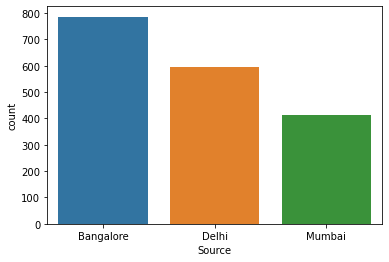

In [15]:
sns.countplot(df['Source'])
df['Source'].value_counts()

Mumbai       786
Bangalore    448
Kolkata      327
Delhi        233
Name: Destination, dtype: int64

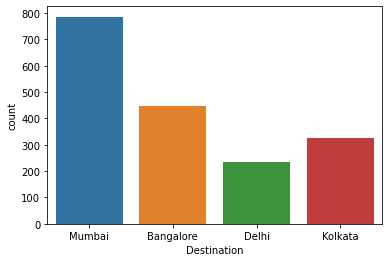

In [16]:
sns.countplot(df['Destination'])
df['Destination'].value_counts()

1-stop                    1416
non-stop                   286
2+-stop                     58
1-stop Via Indore           11
1-stop Via IXU              11
1-stop Via Bhubaneswar       6
1-stop Via Hyderabad         4
1-stop Via Raipur            1
1-stop Via IDR               1
Name: total_stops, dtype: int64

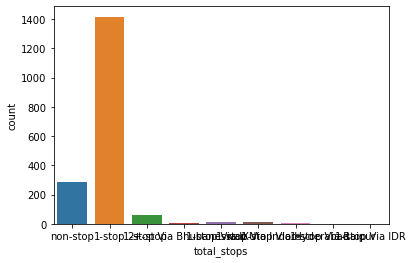

In [17]:
sns.countplot(df['total_stops'])
df['total_stops'].value_counts()

In [18]:
df['duration'].value_counts()

02h 45m    29
01h 35m    28
02h 50m    28
02h 10m    24
02h 15m    23
           ..
20h 00m     1
18h 40m     1
22h 25m     1
16h 30m     1
22h 15m     1
Name: duration, Length: 290, dtype: int64

In [19]:

df['Price'].value_counts()

6529.0     516
8159.0      60
7319.0      52
7308.0      50
13976.0     45
          ... 
16653.0      1
11553.0      1
10784.0      1
6739.0       1
10889.0      1
Name: Price, Length: 366, dtype: int64

In [20]:
# checking the unique values
df.nunique()


airline_name         6
date_of_journey      5
Source               3
Destination          4
departure_time     216
arrival_time       219
duration           290
total_stops          9
Price              366
dtype: int64

FEATURE ENGINEERING

In [21]:
#replacing the stops with count
df['total_stops']=df['total_stops'].replace(['1-stop'],1)
df['total_stops']=df['total_stops'].replace(['2+-stop'],2)
df['total_stops']=df['total_stops'].replace(['1-stop Via IXU'],3)
df['total_stops']=df['total_stops'].replace(['1-stop Via Indore'],4)
df['total_stops']=df['total_stops'].replace(['1-stop Via Bhubaneswar'],5)
df['total_stops']=df['total_stops'].replace(['1-stop Via Hyderabad'],6)
df['total_stops']=df['total_stops'].replace(['1-stop Via Guwahati'],7)
df['total_stops']=df['total_stops'].replace(['1-stop Via IDR'],8)
df['total_stops']=df['total_stops'].replace(['1-stop Via Raipur'],9)
df['total_stops']=df['total_stops'].replace(['non-stop'],0)

In [22]:
df['total_stops'].value_counts()

1    1416
0     286
2      58
3      11
4      11
5       6
6       4
8       1
9       1
Name: total_stops, dtype: int64

In [23]:
#converting the depature_Time into hours,minutes and seconds.
df['Dep_hour']=pd.to_datetime(df['departure_time']).dt.hour
df['Dep_minute']=pd.to_datetime(df['departure_time']).dt.minute

In [24]:
#converting the arrival_Time into hours,minutes and seconds.
df['arr_hour']=pd.to_datetime(df['arrival_time']).dt.hour
df['arr_minute']=pd.to_datetime(df['arrival_time']).dt.minute

In [25]:
#converting the duration column
duration=list(df['duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))    

In [26]:
df['duration_hours']=duration_hours
df['duration_mins']=duration_mins

In [27]:
#Converting the date of journey columns into day month and year 
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], format='%d-%m-%Y')
df['month_of_journey']=pd.to_datetime(df['date_of_journey'],format='%d/%m/%Y')
df['year_of_journey']=pd.to_datetime(df['date_of_journey'],format='%d/%m/%Y')

In [28]:
df.head()

,airline_name,date_of_journey,Source,Destination,departure_time,arrival_time,duration,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,month_of_journey,year_of_journey
0,Indigo,2022-05-05,Bangalore,Mumbai,06:00,07:35,01h 35m,0,6529.0,6,0,7,35,1,35,2022-05-05,2022-05-05
1,GO FIRST,2022-05-05,Bangalore,Mumbai,05:45,07:25,01h 40m,0,6529.0,5,45,7,25,1,40,2022-05-05,2022-05-05
2,AirAsia,2022-05-05,Bangalore,Mumbai,22:40,00:20,01h 40m,0,6529.0,22,40,0,20,1,40,2022-05-05,2022-05-05
3,Indigo,2022-05-05,Bangalore,Mumbai,07:00,08:50,01h 50m,0,6529.0,7,0,8,50,1,50,2022-05-05,2022-05-05
4,AirAsia,2022-05-05,Bangalore,Mumbai,19:30,21:20,01h 50m,0,6529.0,19,30,21,20,1,50,2022-05-05,2022-05-05


In [29]:
#Dropping the columns which are converted
df.drop(columns=['date_of_journey','year_of_journey','departure_time','arrival_time','duration'],axis=1,inplace=True)

In [30]:
df.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,month_of_journey
0,Indigo,Bangalore,Mumbai,0,6529.0,6,0,7,35,1,35,2022-05-05
1,GO FIRST,Bangalore,Mumbai,0,6529.0,5,45,7,25,1,40,2022-05-05
2,AirAsia,Bangalore,Mumbai,0,6529.0,22,40,0,20,1,40,2022-05-05
3,Indigo,Bangalore,Mumbai,0,6529.0,7,0,8,50,1,50,2022-05-05
4,AirAsia,Bangalore,Mumbai,0,6529.0,19,30,21,20,1,50,2022-05-05


In [31]:
# Checking correlation
df.corr()

,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
total_stops,1.000000,0.149402,-0.031111,-0.027173,0.067178,0.004713,0.429780,-0.085535
Price,0.149402,1.000000,-0.104768,0.035615,0.134076,0.023076,0.075433,-0.070741
Dep_hour,-0.031111,-0.104768,1.000000,0.075774,-0.112848,0.059804,0.061582,0.046685
Dep_minute,-0.027173,0.035615,0.075774,1.000000,-0.035404,0.025500,-0.023408,0.006758
arr_hour,0.067178,0.134076,-0.112848,-0.035404,1.000000,0.055808,0.059882,-0.075131
arr_minute,0.004713,0.023076,0.059804,0.025500,0.055808,1.000000,0.018501,0.057985
duration_hours,0.429780,0.075433,0.061582,-0.023408,0.059882,0.018501,1.000000,-0.137954
duration_mins,-0.085535,-0.070741,0.046685,0.006758,-0.075131,0.057985,-0.137954,1.000000


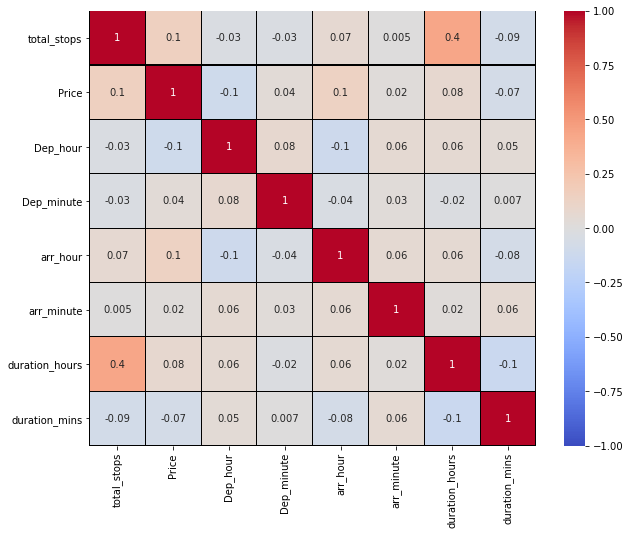

In [32]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [33]:
#STATISTICAL sUMMARY
df.describe()

,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000
mean,0.936455,10140.845039,12.532330,25.699554,14.890747,27.876254,10.361204,28.497770
std,0.663256,4305.316793,5.522283,17.956026,6.415724,17.467339,7.216126,17.511473
min,0.000000,5323.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,6529.000000,8.000000,10.000000,10.000000,10.000000,5.000000,15.000000
50%,1.000000,8159.000000,12.000000,25.000000,16.000000,30.000000,9.000000,30.000000
75%,1.000000,13220.000000,17.000000,40.000000,20.000000,45.000000,14.000000,45.000000
max,9.000000,32402.000000,23.000000,55.000000,23.000000,55.000000,36.000000,55.000000


In [34]:
#Dropping the unwanted column
df.drop(columns=['month_of_journey'],axis=1,inplace=True)
df

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,Indigo,Bangalore,Mumbai,0,6529.0,6,0,7,35,1,35
1,GO FIRST,Bangalore,Mumbai,0,6529.0,5,45,7,25,1,40
2,AirAsia,Bangalore,Mumbai,0,6529.0,22,40,0,20,1,40
3,Indigo,Bangalore,Mumbai,0,6529.0,7,0,8,50,1,50
4,AirAsia,Bangalore,Mumbai,0,6529.0,19,30,21,20,1,50
...,...,...,...,...,...,...,...,...,...,...,...
1789,SpiceJet,Delhi,Kolkata,1,21599.0,13,5,18,30,5,25
1790,Air India,Delhi,Kolkata,1,6529.0,21,15,23,50,26,35
1791,Air India,Delhi,Kolkata,1,6529.0,20,0,23,50,27,50
1792,Air India,Delhi,Kolkata,1,6529.0,19,0,23,50,28,50


VISUALIZATION

UNIVARIATE ANALYSIS

In [35]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['airline_name', 'Source', 'Destination']


In [36]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['total_stops', 'Price', 'Dep_hour', 'Dep_minute', 'arr_hour', 'arr_minute', 'duration_hours', 'duration_mins']


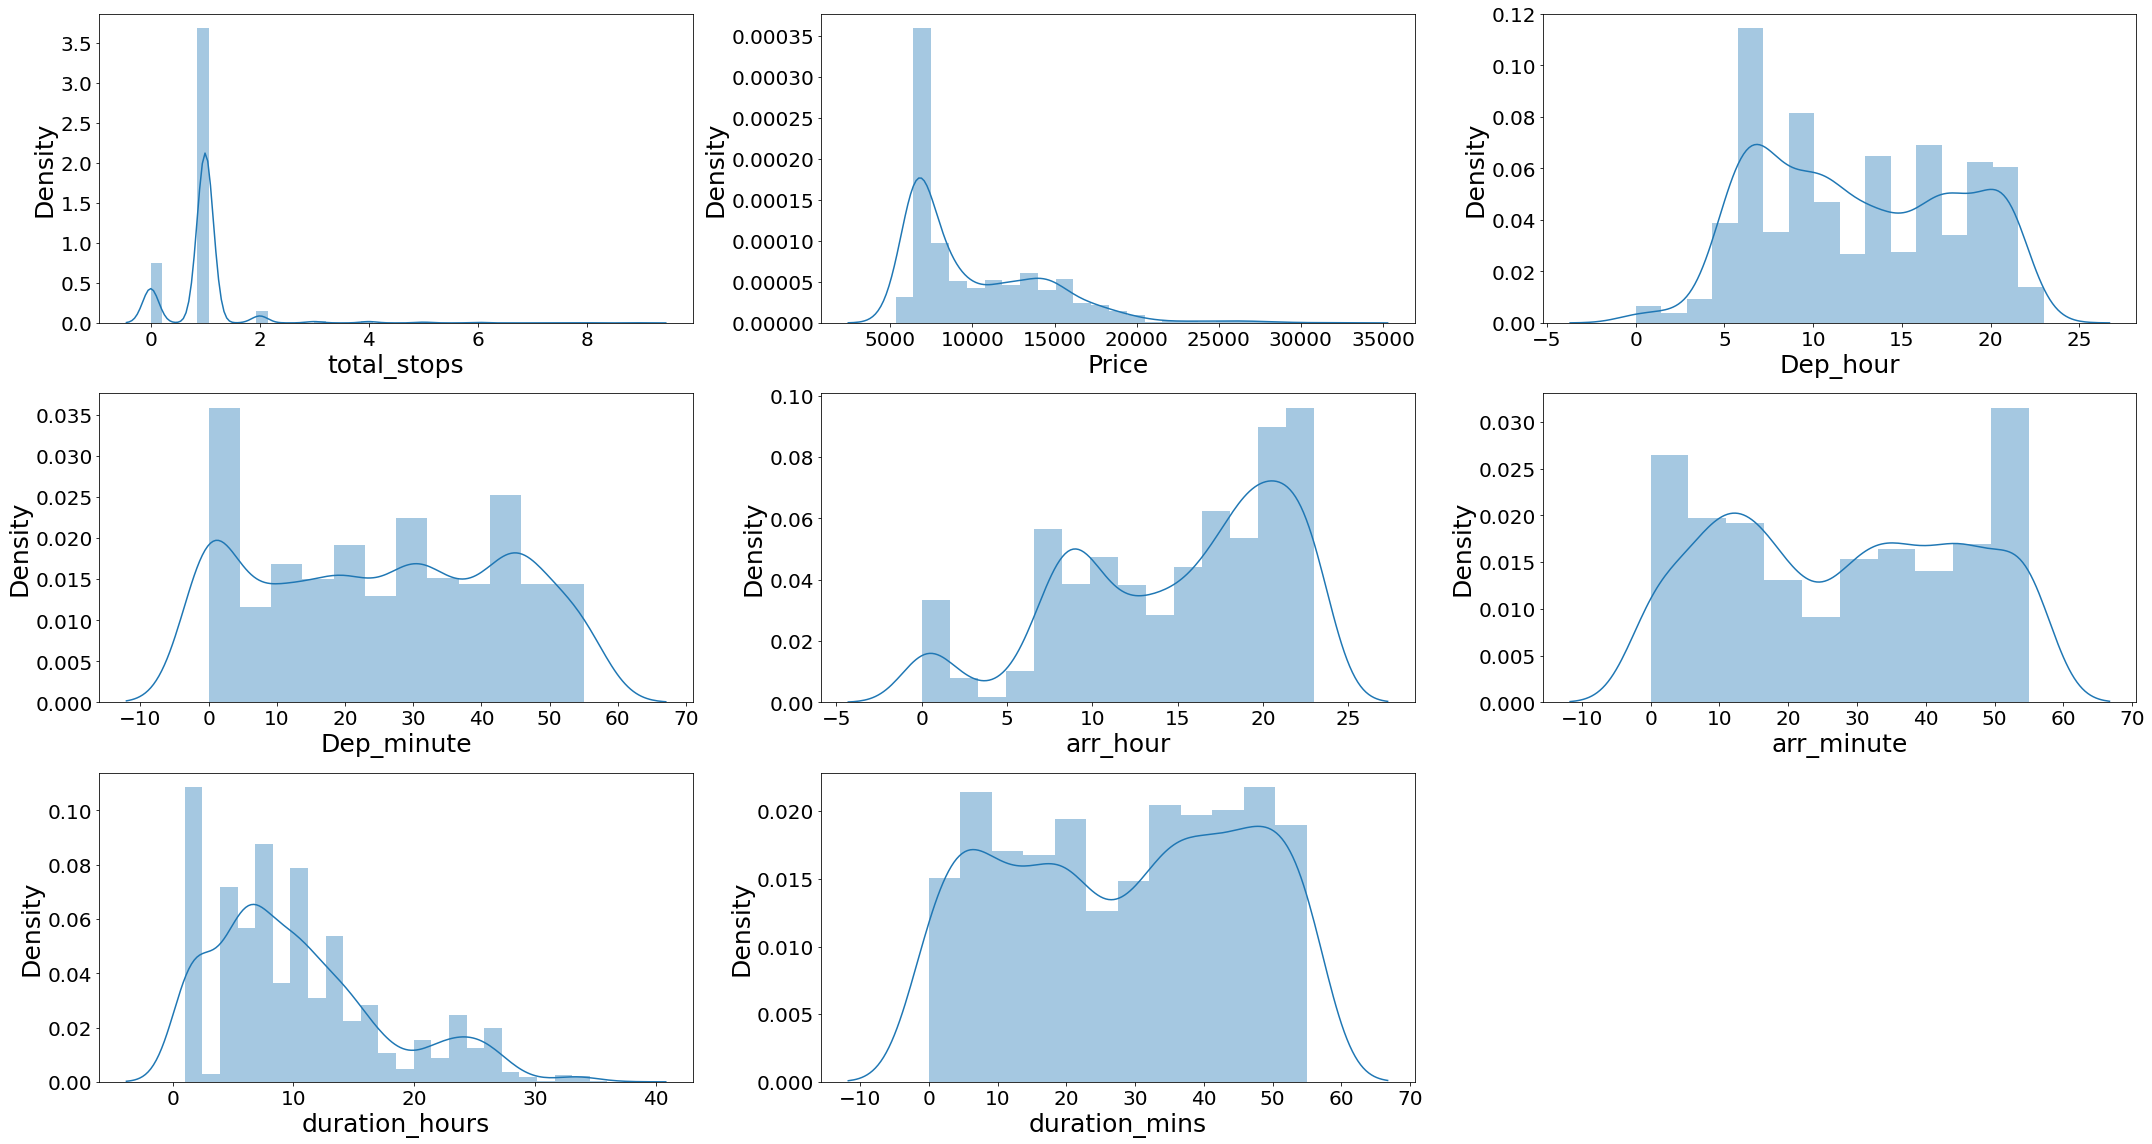

In [37]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

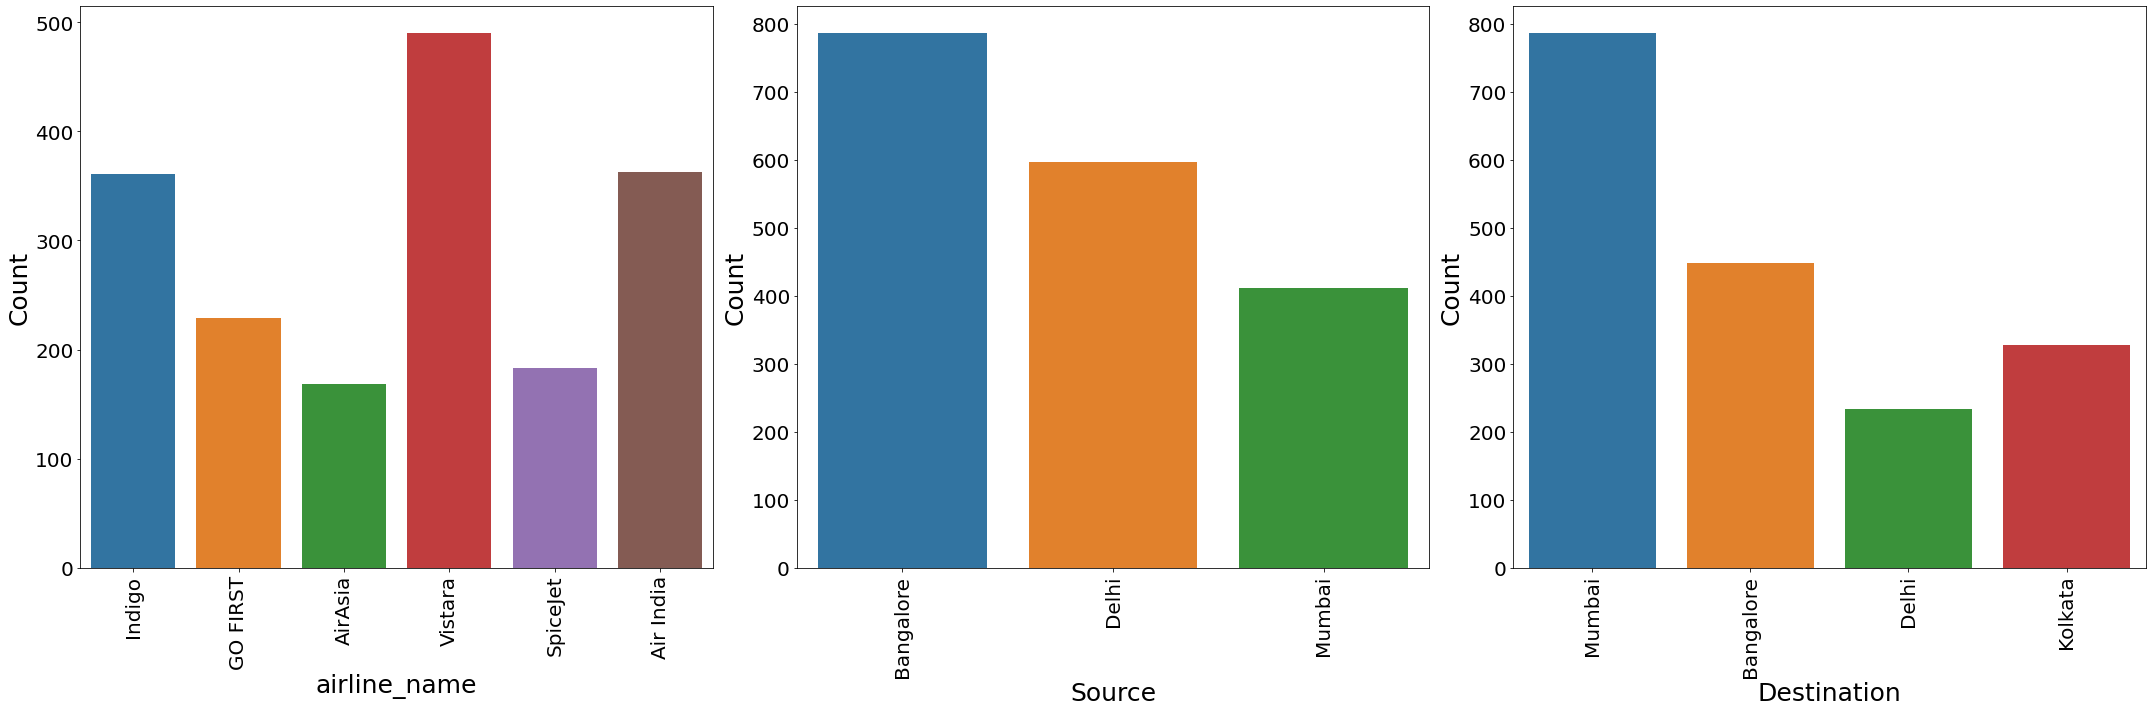

In [38]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observations:
1. Vistara has maximum count which means most of the passengers preferred Vistara for there travelling.
2. Bangalore has maximum count for source which means maximum passengers are choosing Bangalore as there source.
3. Mumbai has maximum count for Destination which means maximum passengers are choosing Mumbai as there Destination.

BIVARIATE ANALYSIS

In [39]:
col=['total_stops', 'Dep_hour', 'Dep_minute', 'arr_hour', 'arr_minute']

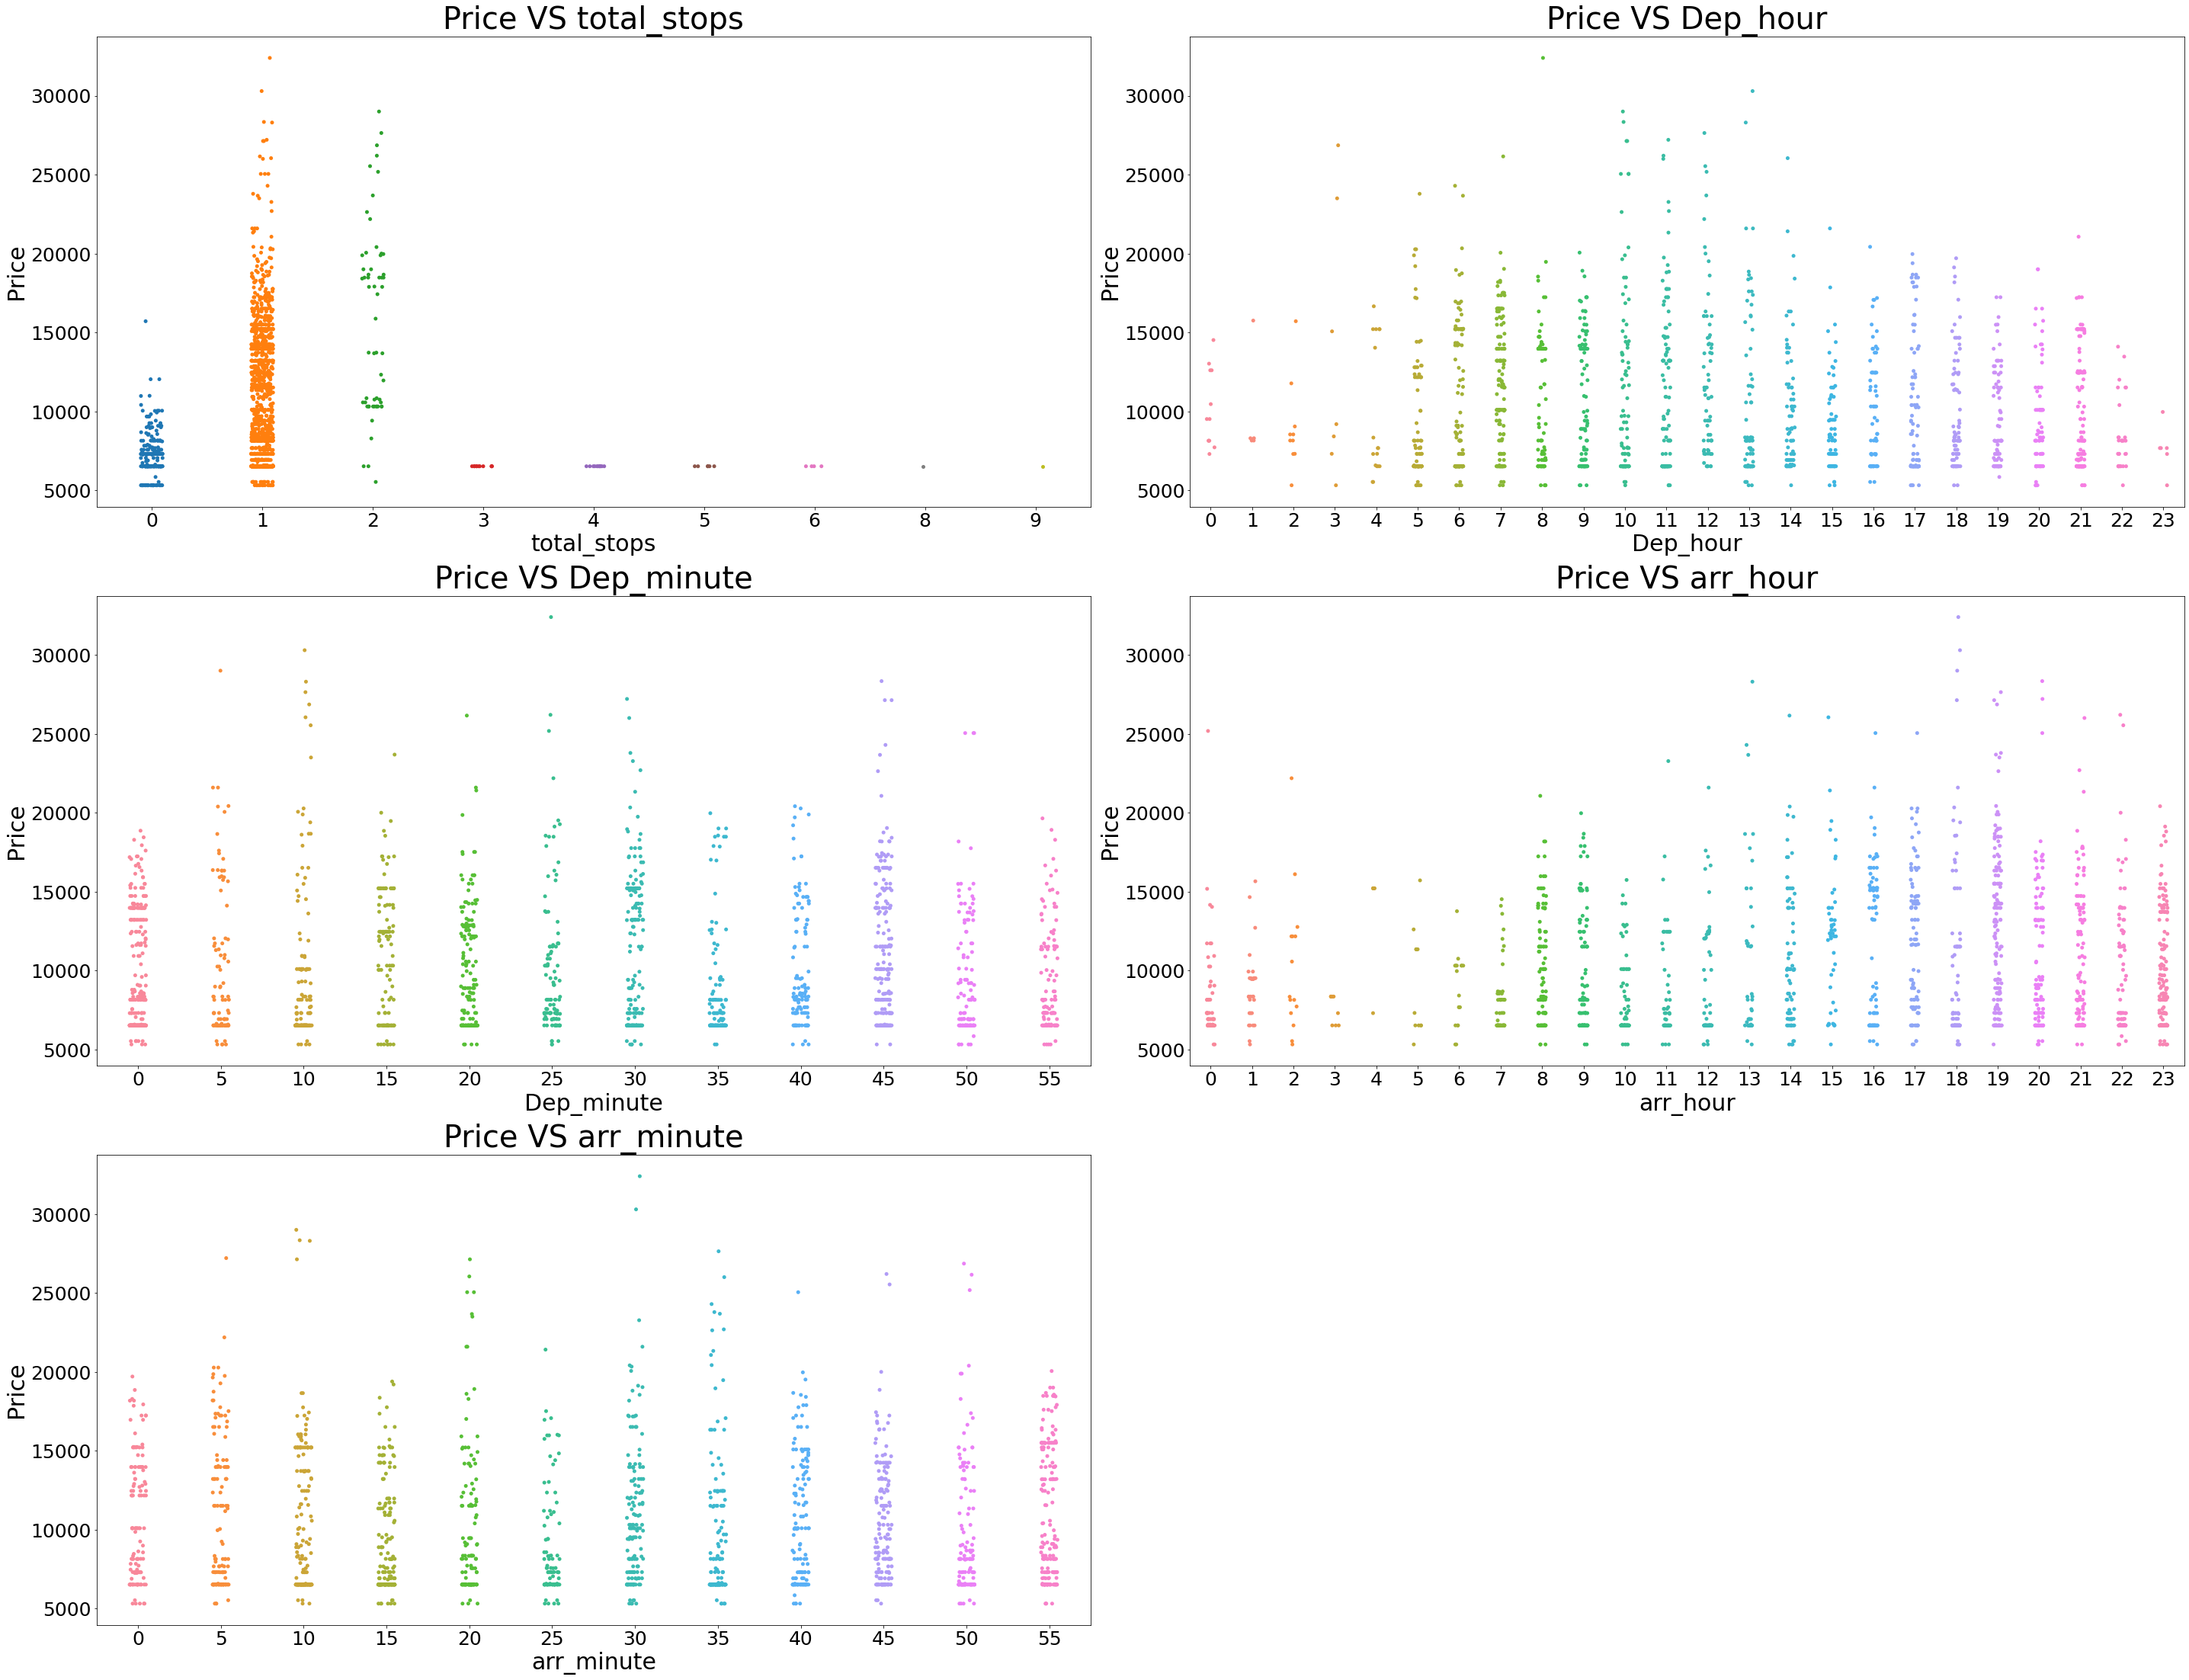

In [40]:
#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

Observations:

1. Flights with 1 stop costs more price compared to other flights.
2. At the noon time of every day the flight Prices are high so it looks good to book flights rather than this departure time.
3. And Departure minute has less relation with target Price.
4. At 7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights rather than this arrival time.
5. And Arrival minute has less relation with target Price.

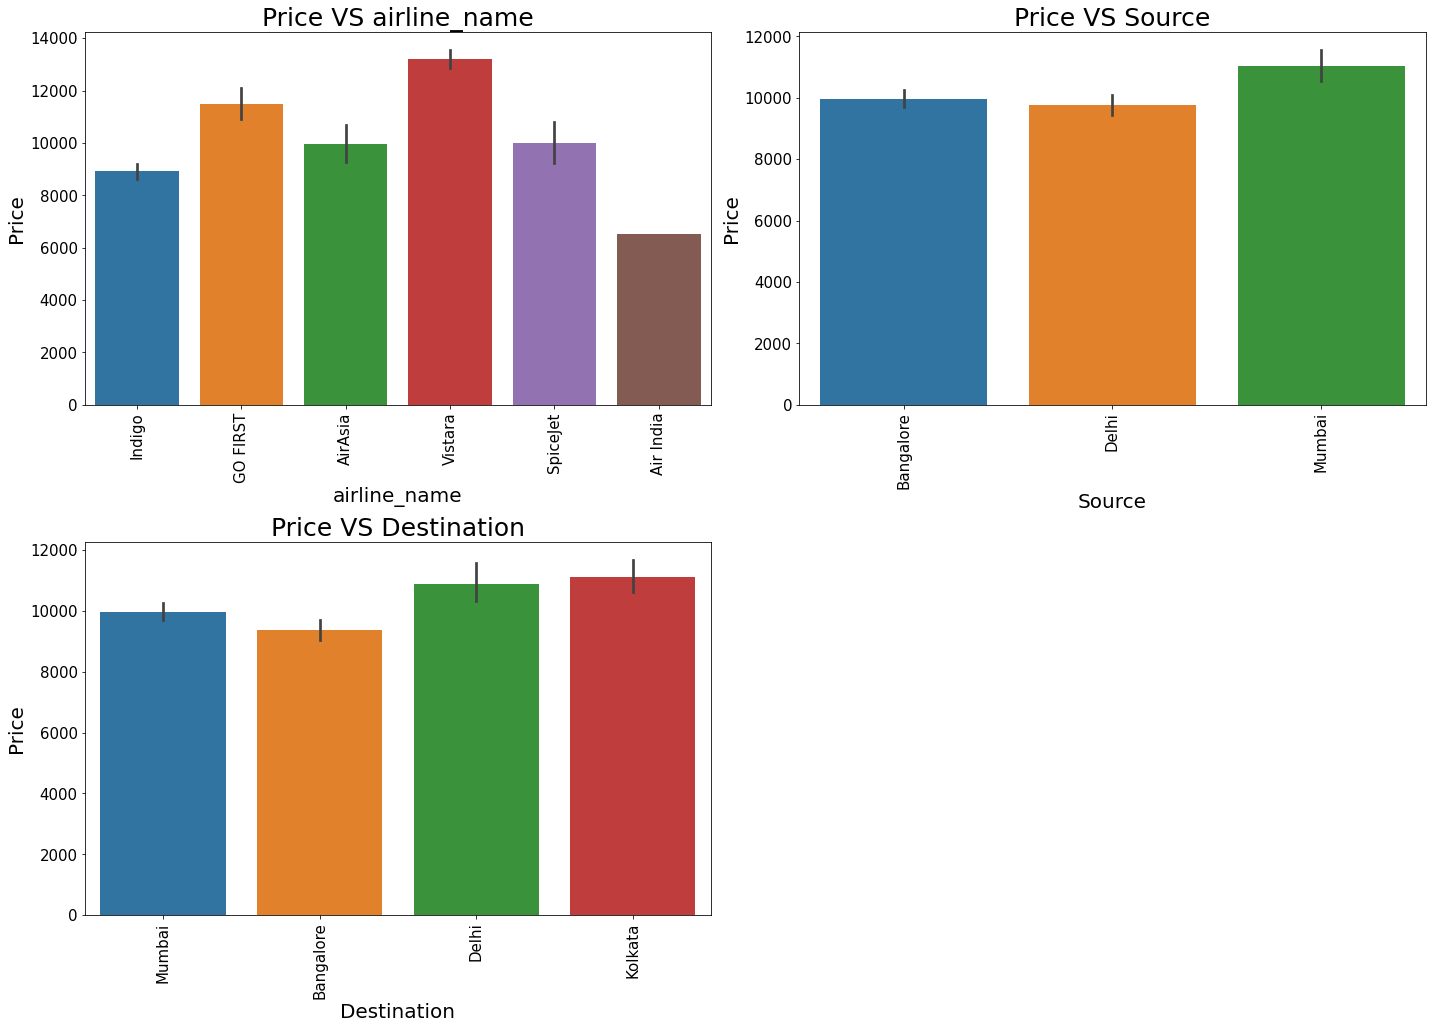

In [41]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(categorical_columns[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

Observations:

1. For Go First Airlines the Price is high compared to other Airlines.
2. All the Sources has approximately same prices.
3. Destination also has the approximately same prices.

MULTI-VARIATE ANALYSIS

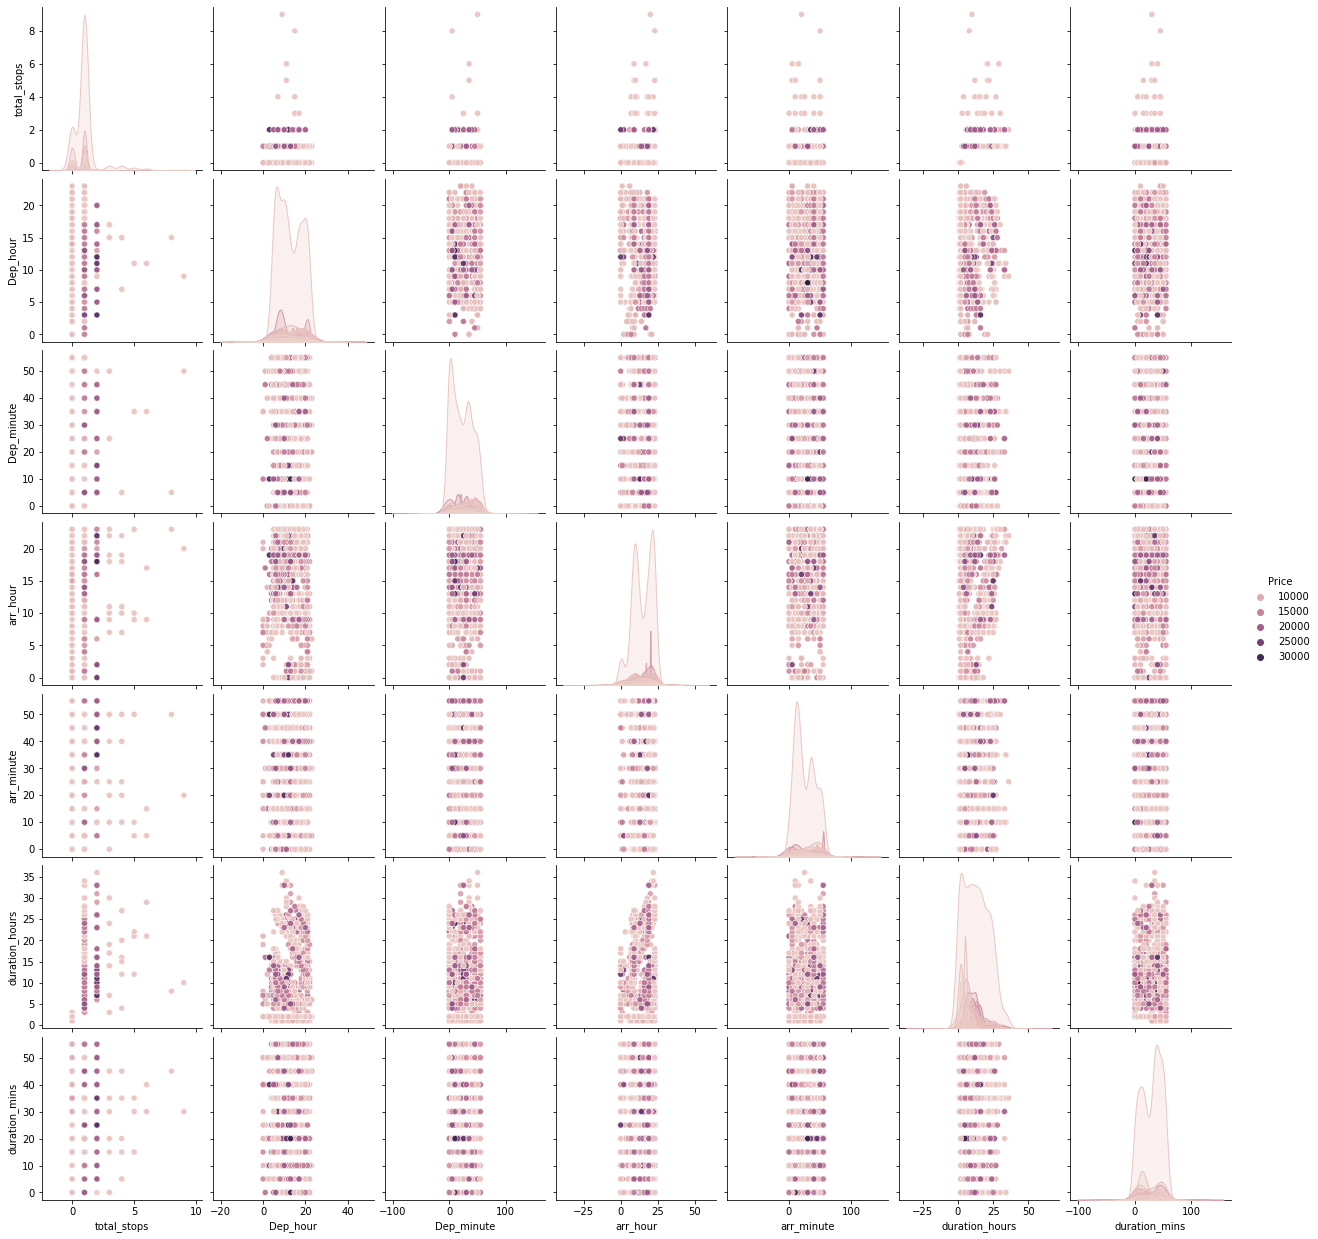

In [42]:
#pair ploting for df
sns.pairplot(df,hue="Price")

<AxesSubplot:title={'center':'Box-plot of duration_hours'}, xlabel='duration_hours'>

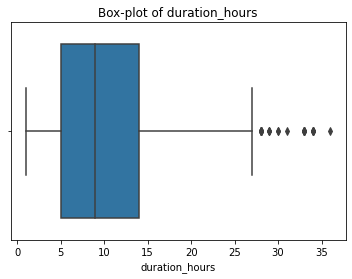

In [43]:
# checking outliers in Item Outlet Sales
plt.title('Box-plot of duration_hours')
sns.boxplot('duration_hours',data=df)

In [44]:
# Removing the outliers
df=df[df['duration_hours']<25]

<AxesSubplot:title={'center':'Box-plot of duration_hours after removing the outliers'}, xlabel='duration_hours'>

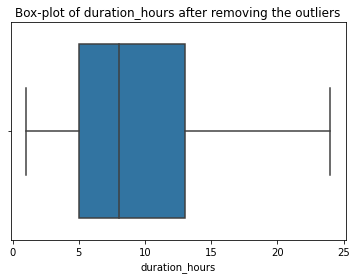

In [45]:
#After removing the Outliers
plt.title('Box-plot of duration_hours after removing the outliers')
sns.boxplot('duration_hours',data=df)

In [46]:
# After the removal of outliers
df.shape

(1680, 11)

In [47]:
# Percentage of loss data
loss_percent=(1794-1680)/1794*100
print(loss_percent)

6.354515050167224


In [48]:
# Checking Skewness after removing outliers
df.skew()

total_stops       3.931246
Price             1.285790
Dep_hour          0.091046
Dep_minute        0.018361
arr_hour         -0.603606
arr_minute        0.035204
duration_hours    0.659793
duration_mins    -0.087136
dtype: float64

In [49]:
# Separating categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['airline_name', 'Source', 'Destination']


In [50]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [51]:
df.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,3,0,3,0,6529.0,6,0,7,35,1,35
1,2,0,3,0,6529.0,5,45,7,25,1,40
2,1,0,3,0,6529.0,22,40,0,20,1,40
3,3,0,3,0,6529.0,7,0,8,50,1,50
4,1,0,3,0,6529.0,19,30,21,20,1,50


In [52]:
# Seperating the dataset
x = df.drop("Price",axis=1)
y = df["Price"]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [54]:
X.head()

,airline_name,Source,Destination,total_stops,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins
0,0.149038,-0.992588,0.960414,-1.430832,-1.173193,-1.423707,-1.204631,0.424013,-1.39837,0.356711
1,-0.398847,-0.992588,0.960414,-1.430832,-1.352977,1.080533,-1.204631,-0.150225,-1.39837,0.641944
2,-0.946732,-0.992588,0.960414,-1.430832,1.703340,0.802284,-2.285133,-0.437344,-1.39837,0.641944
3,0.149038,-0.992588,0.960414,-1.430832,-0.993410,-1.423707,-1.050274,1.285371,-1.39837,1.212410
4,-0.946732,-0.992588,0.960414,-1.430832,1.163990,0.245787,0.956373,-0.437344,-1.39837,1.212410


In [55]:
# Checking for Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.102209,airline_name
1,1.709473,Source
2,1.693863,Destination
3,1.294278,total_stops
4,1.051294,Dep_hour
5,1.058836,Dep_minute
6,1.062258,arr_hour
7,1.055702,arr_minute
8,1.311320,duration_hours
9,1.062335,duration_mins


There is no multicollinearity issue in this dataset.

In [56]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.6538124001341054  on Random_state  80


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Feature Importance

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [59]:
print(feature_selection.feature_importances_)

[0.35062415 0.07381476 0.06628266 0.17060372 0.07586933 0.05618687
 0.05556989 0.03952924 0.07877899 0.03274039]


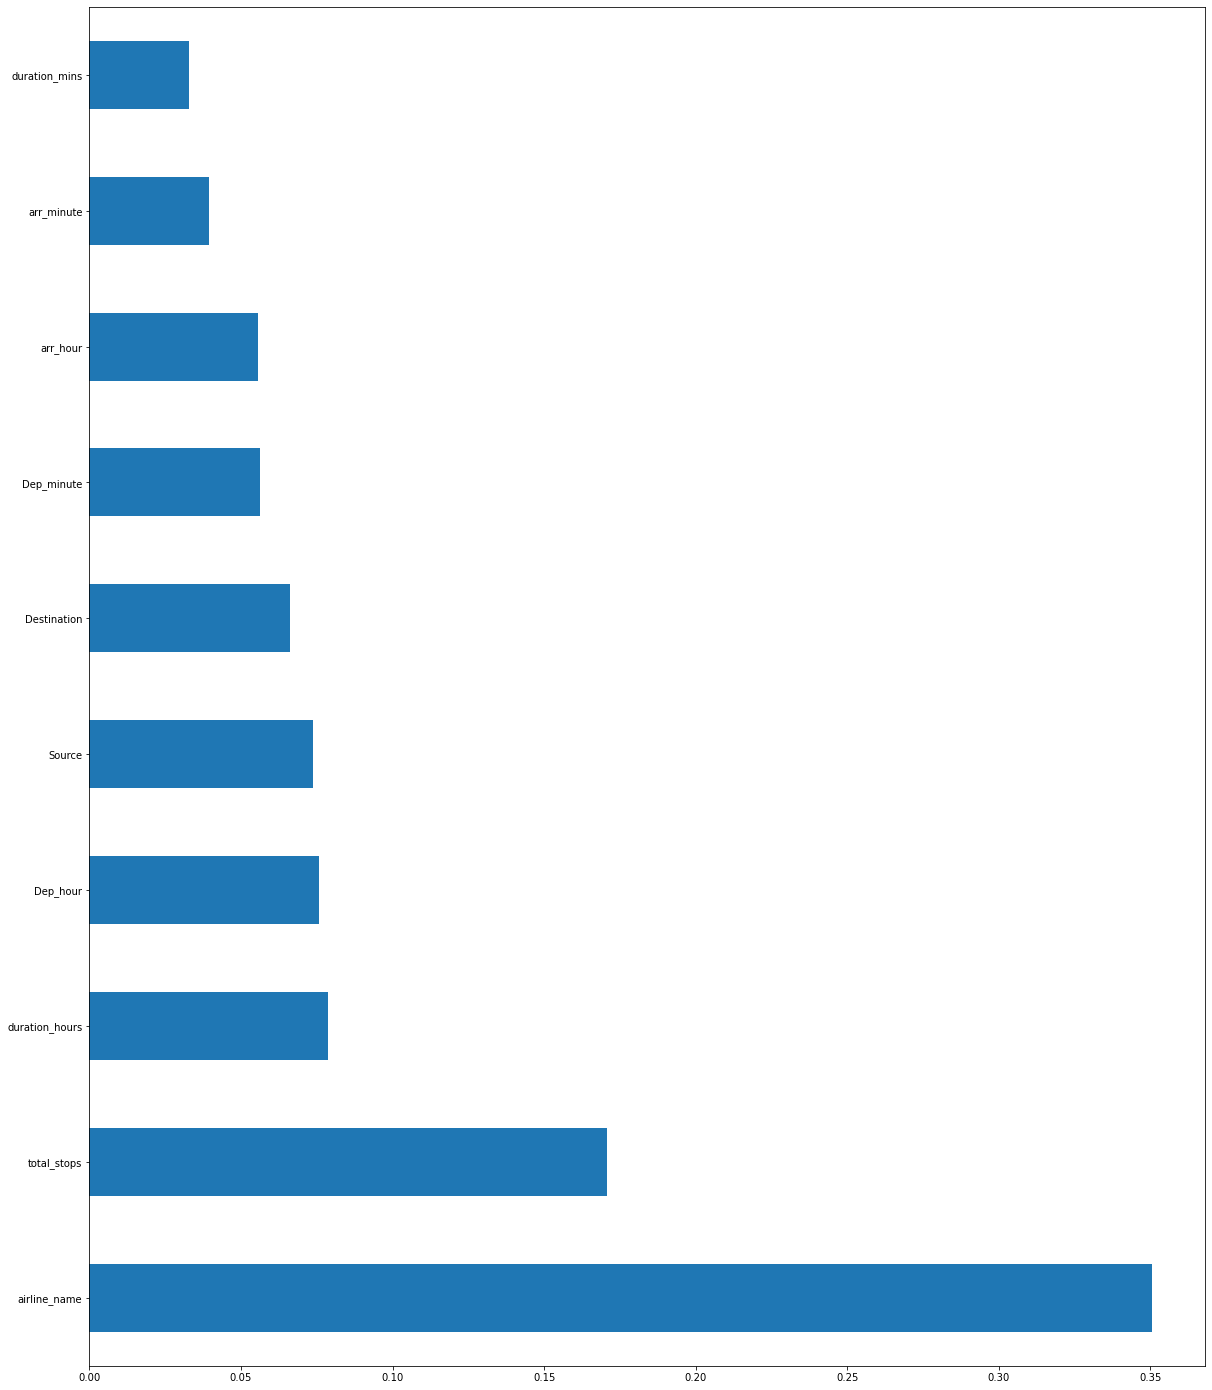

In [60]:
plt.figure(figsize=(20,25))
feature_importances=pd.Series(feature_selection.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
lr_predict=lr.predict(X_test)

0.3007706710369302


In [86]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 12658517.585033586
MAE: 2583.3997168508367
r2_score: -1.2066481619426543


1. Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 64.37237549075506
mean_squared_error: 6523296.6046355795
mean_absolute_error: 1571.4413050280298
root_mean_squared_error: 2554.0745103922827


2. EXtra Trees Regressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6084157765032598
mean_squared_error: 7169773.653874408
mean_absolute_error: 1581.4255357142854
root_mean_squared_error: 2677.6433022108095


3. Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.5988703752585782
mean_squared_error: 7344546.696947088
mean_absolute_error: 1829.897689601789
root_mean_squared_error: 2710.0824151577176


4. Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.42230624906713654
mean_squared_error: 10577375.662533067
mean_absolute_error: 1812.7926587301588
root_mean_squared_error: 3252.287758260801


5. KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.502097367704128
mean_squared_error: 9116427.478492063
mean_absolute_error: 2013.9932539682538
root_mean_squared_error: 3019.342226130066


Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [DecisionTreeRegressor(),
             ExtraTreesRegressor(),
             KNN(),
             RandomForestRegressor(),]
             
             
            


names = ['D','ER','K','RF']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

D    : 27368944.949372, 30525444.576864
ER    : 18362584.255473, 14827167.105264
K    : 15516720.725190, 10342831.113129
RF    : 17135326.824495, 15057199.429129


In [71]:
# Hyper Parameter Tuning using RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
            #'criterion':['mse','mae']}

In [72]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [73]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [74]:
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=100, verbose=2)

In [75]:
rf_randomized.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [76]:
rf_final=rf_randomized.best_estimator_

In [77]:
y_pred_random=rf_final.predict(X_test)

In [90]:
Best_mod=RandomForestRegressor(max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80,n_jobs=1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 67.04099107553559
mean_squared_error: 6034682.1875065565
mean_absolute_error: 1517.299818512685
RMSE value: 2456.559013642163


Hence, we can see that Random Forest gives us the best accuracy score.

In [91]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight Price Prediction.pkl")

['Flight Price Prediction.pkl']

In [92]:
# Loading the saved model
model=joblib.load("Flight Price Prediction.pkl")

#Prediction
pred = model.predict(X_test)
pred

array([ 9183.93102679, 14250.00926587,  8710.50110119,  6961.58479167,
       14272.70333333, 11019.49697917, 17408.12292659, 14269.740625  ,
       13495.26622024, 12018.4946875 , 15718.08570437,  9292.30601732,
       12761.575     ,  6529.        , 12961.14781746, 13926.27022321,
        9535.58224702, 17147.96459821,  6529.        ,  6529.        ,
        8585.6286756 ,  6529.        , 14787.81520833,  8847.4618502 ,
        7400.68645833,  6529.        ,  6529.        , 13723.61341991,
       14475.87296131,  7082.59236607,  6529.        ,  6529.        ,
       10065.83860119, 10259.13008929, 15391.33834821,  6529.        ,
       11310.5746131 ,  9889.66291667, 15284.30931548, 14503.42859578,
        6529.        , 14652.0244688 ,  6932.71636905, 10295.31958333,
        6529.        ,  6529.        , 14494.26134425,  6529.        ,
       13298.12357143, 11182.3740625 ,  6824.31446429, 18657.11758433,
        9184.43768849,  6529.        ,  6529.        ,  8510.65839286,
      

In [93]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
Predicted,9183.931027,14250.009266,8710.501101,6961.584792,14272.703333,11019.496979,17408.122927,14269.740625,13495.26622,12018.494687,...,13903.717857,6529.0,8552.705833,13907.09375,6529.0,10100.935,6529.0,12663.777187,13215.037555,9540.531339
Actual,8159.000000,14194.000000,9093.000000,7054.000000,18289.000000,14457.000000,15882.000000,12558.000000,12296.00000,9525.000000,...,8895.000000,6529.0,8159.000000,14250.00000,6529.0,8148.000,6529.0,14250.000000,15498.000000,7319.000000
